## Доверительные интервалы

In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math

### Задача 1

### Равномерное распределение

$R[0, \theta]$ с $\theta_0 = 10$. Построим доверительные интервалы используя статистики: $\overline{X}$, $X_{(1)}$, $X_{(n)}$ уровня доверия $\alpha = 0.95$. Итак получаем три доверительных интервала:
$$\left(\frac{\overline{X}}{\frac{1}{2} + \sqrt{\frac{1}{12n(1-\alpha)}}}, \frac{\overline{X}}{\frac{1}{2} - \sqrt{\frac{1}{12n(1-\alpha)}}}\right) \tag{1}$$
$$\left(X_{(1)}, \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}} \right) \tag{2}$$
$$\left( X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}} \right) \tag{3}$$

(0, 25)

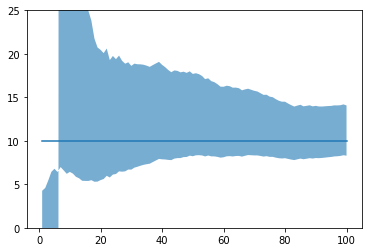

In [135]:
#задаем изначальные параметры
N = 100
n = np.arange(1, N + 1)
theta0 = 10
X = sps.uniform.rvs(size=N, loc=0, scale=theta0)
alpha = 0.95

#считаем по формуле (1)
def LeftBorder1(sample):
    return (sample.cumsum() / n) / (1/2 + np.sqrt(1/(12*n*(1 - alpha))))
def RightBorder1(sample):
    return (sample.cumsum() / n) / (1/2 - np.sqrt(1/(12*n*(1 - alpha))))

plt.fill_between(n, LeftBorder1(X), RightBorder1(X), alpha=0.6)
plt.plot(n, np.ones(N) * theta0)
plt.ylim(0, 25)

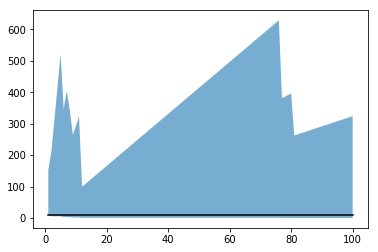

In [136]:
#считаем по формуле (2)
def LeftBorder2(sample):
    return np.minimum.accumulate(sample)
def RightBorder2(sample):
    return (np.minimum.accumulate(sample)) / (1 - alpha**(1 / n))

plt.fill_between(n, LeftBorder2(X), RightBorder2(X), alpha=0.6)
plt.plot(n, np.ones(N) * theta0, color="black")

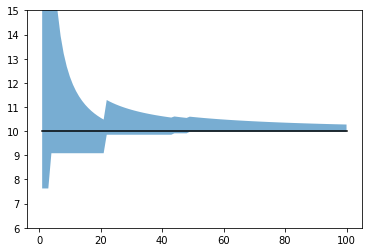

In [137]:
#считаем по формуле (3)
def LeftBorder3(sample):
    return np.maximum.accumulate(sample)
def RightBorder3(sample):
    return (np.maximum.accumulate(sample)) / (1 - alpha)**(1/n)

plt.ylim(6, 15)
plt.plot(n, np.ones(N) * theta0, color="black")
plt.fill_between(n, LeftBorder3(X), RightBorder3(X), alpha=0.6)

In [138]:
#обращаю внимание на введенную функцию, в дальнейшем я буду ее везде использовать для опрделения 
#вероятност попадания истинного значения в ДИ 
def LavelOfConfidence(getSample, LeftBorder, RightBorder, theta0):
    M = 1000  #кол-во экспериментов (кол-во определяется тем, что вероятность должна получится около ур доверия)
    number = 0  
    for i in range(M):
        X = getSample()
        N = X.size
        number += (LeftBorder(X)[N - 1] <= theta0 and RightBorder(X)[N - 1] >= theta0)
    return ((number/M * 100).round(1))

def getSample():  # с помощью этой функции получаем выборку
    return sps.uniform.rvs(size=N, loc=0, scale=theta0)

level1 = LavelOfConfidence(getSample, LeftBorder1, RightBorder1, theta0)
level2 = LavelOfConfidence(getSample, LeftBorder2, RightBorder2, theta0)
level3 = LavelOfConfidence(getSample, LeftBorder3, RightBorder3, theta0)
print("Вероятность попадания в (1) интервал {}%".format(level1))
print("Вероятность попадания в (2) интервал {}%".format(level2))
print("Вероятность попадания в (3) интервал {}%".format(level3))

Вероятность попадания в (1) интервал 100.0%
Вероятность попадания в (2) интервал 96.4%
Вероятность попадания в (3) интервал 94.9%


По результатам видно, что 2 и 3 - интервалы являются точными, а вот 1 - неточный доверительный интервал. При этом наименьшую длину имеет 3 интервал (при размере выборки больше 30), а вот 2 интервал даже при достаточно больших n имеет все равно существеную длину. (Масштаб на 1 и 3 графиках уменьшен, чтобы картинка была более информативна). Еще стоит заметить, что 1-ый интервал при малых n - не свовсем верен, поэтому стоит смотреть тольку ту часть который начинает включать инстинное значение. 

### Распределение Коши

$Cauchy(\theta)$, $\theta_0 = 10$. Для уровня доверия $\alpha = 0.95$ получаем доверительный интервал:
$$\left(\hat{\mu_n} - \frac{\pi}{2}\frac{u_{\frac{1+\alpha}{2}}}{\sqrt{n}}, \hat{\mu_n} - \frac{\pi}{2}\frac{u_{\frac{1 - \alpha}{2}}}{\sqrt{n}}\right)$$

Вероятность попадания в данный интервал 95.4%


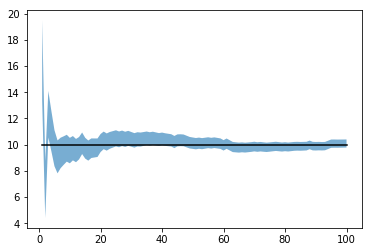

In [139]:
N = 100
n = np.arange(1, N + 1)
theta0 = 10
alpha = 0.95
X = sps.cauchy.rvs(size=N, loc=theta0)

def SampleMean(X):  #функция возвращающая выборочные медианы
    res = np.zeros(X.size)
    for i in range(X.size):
        x = np.sort(X[:i + 1])
        if(i % 2 == 0):
            res[i] = x[i // 2]
        if(i % 2 == 1):
            res[i] = (x[i // 2] + x[i // 2 + 1]) / 2
    return res

def Standartppf(gamma):  #функция везде используется в дальнейшем, которая определяет квантили 
    return sps.norm.ppf(q=gamma, loc=0, scale=1) #стандартного нормального закона

def LeftBorder(X):
    return SampleMean(X) - (math.pi * Standartppf((1 + alpha) / 2) / (2 * np.sqrt(n)))

def RightBorder(X):
    return SampleMean(X) - (math.pi * Standartppf((1 - alpha) / 2) / (2 * np.sqrt(n)))

plt.plot(n, np.ones(N) * theta0, color="black")
plt.fill_between(n, LeftBorder(X), RightBorder(X), alpha=0.6)

def getSample():
    return sps.cauchy.rvs(size=N, loc=theta0)

print("Вероятность попадания в данный интервал {}%".format(\
                        LavelOfConfidence(getSample, LeftBorder, RightBorder, theta0)))

### Рспределение Пуассона

$Pois(\theta)$, $\theta_0 = 10$. Построить асимптотически доверительный интервал уровня доверия $\alpha = 0.95$. Асимптотический доверительный интервал будет находится по формуле:
$$\left( \overline{X} - \sqrt{\frac{\overline{X}}{n}}u_{\frac{1+\alpha}{2}}, \overline{X} - \sqrt{\frac{\overline{X}}{n}}u_{\frac{1-\alpha}{2}} \right)$$ где $u_{\frac{1+\alpha}{2}}$ и $u_{\frac{1-\alpha}{2}}$ - соответствующие квантили $N(0, 1)$

Вероятность попадания в доверительный интервал состовляет: 95.0%


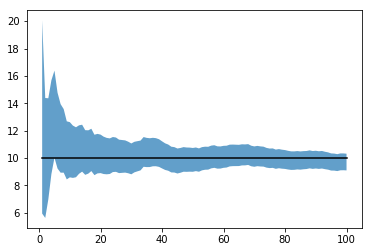

In [95]:
N = 100
n = np.arange(1, N + 1)
theta0 = 10
X = sps.poisson.rvs(size=N, mu=theta0)
alpha = 0.95

def getSample():
    return sps.poisson.rvs(size=N, mu=theta0)

def LeftBorder(X):
    n = np.arange(1, X.size + 1)
    sample_mean = X.cumsum() / n
    return sample_mean - np.sqrt(sample_mean / n) * Standartppf((1 + alpha) / 2)

def RightBorder(X):
    n = np.arange(1, X.size + 1)
    sample_mean = X.cumsum() / n
    return sample_mean - np.sqrt(sample_mean / n) * Standartppf((1 - alpha) / 2)

plt.fill_between(n, LeftBorder(X), RightBorder(X), alpha=0.7)
plt.plot(n, np.ones(N)*theta0, color="black")
print("Вероятность попадания в доверительный интервал состовляет: {}%".format(\
                    LavelOfConfidence(getSample, LeftBorder, RightBorder, theta0)))

### Гамма-распределене

$\Gamma(\theta, \lambda), \; \theta_0 = 10, \; \lambda_0 = 3$. Построим два асимптотических интервала уровня доверия $\alpha=0.95$ для двух случаев: когда $\lambda_0$ - известен и когда $\lambda_0$ - неизвестен. В первом случае полаем доверительный интервал вида:
$$\left(\lambda_0\overline{X} - \lambda_0\sqrt{\frac{\overline{X}}{n\lambda_0}}u_{\frac{1+\alpha}{2}},\; \lambda_0\overline{X} - \lambda_0\sqrt{\frac{\overline{X}}{n\lambda_0}}u_{\frac{1-\alpha}{2}} \right), \tag{1}$$ 
Если параметр $\lambda_0$ - неизвестен, то воспользуемся теоремой о наследовании сходимости. Так как мы знаем, что $s^2$ состоятельная оценка $\cfrac{\theta}{\lambda^2}$, а $\overline{X}$ - состоятельная оценка $\cfrac{\theta}{\lambda}$, то отсюда состоятельной оценкой $\lambda$ будет $\cfrac{\overline{X}}{s^2}$. Тогда просто в предыдущую формулу  вместо $\lambda_0$ подставим эти выражения и получим:
$$\left(\frac{\overline{X}^2}{s^2} - \frac{\overline{X}}{s^2}\sqrt{\frac{s^2}{n}}u_{\frac{1+\alpha}{2}},\; \frac{\overline{X}^2}{s^2} - \frac{\overline{X}}{s^2}\sqrt{\frac{s^2}{n}}u_{\frac{1-\alpha}{2}} \right) \tag{2}$$ 

Вероятность попадания в доверительный интервал состовляет: 94.9%


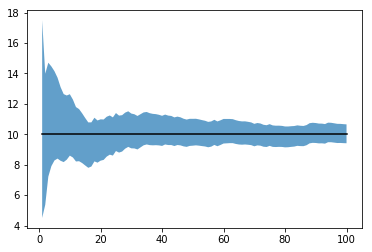

In [117]:
N = 100
theta0 = 10
lambda0 = 3
alpha = 0.95
X = sps.gamma.rvs(size=N, a=theta0, scale=1 / lambda0)
n = np.arange(1, N + 1)

def getSample():
    return sps.gamma.rvs(size=N, a=theta0, scale=1 / lambda0)

def LeftBorder1(X):
    n = np.arange(1, X.size + 1)
    sample_mean = X.cumsum() / n
    return lambda0 * (sample_mean - np.sqrt((sample_mean) / (n * lambda0)) * Standartppf((1 + alpha) / 2))

def RightBorder1(X):
    n = np.arange(1, X.size + 1)
    sample_mean = X.cumsum() / n
    return lambda0 * (sample_mean - np.sqrt((sample_mean) / (n * lambda0)) * Standartppf((1 - alpha) / 2))

plt.fill_between(n, LeftBorder1(X), RightBorder1(X), alpha=0.7)
plt.plot(n, np.ones(N)*theta0, color="black")
print("Вероятность попадания в доверительный интервал состовляет: {}%".format(\
                    LavelOfConfidence(getSample, LeftBorder1, RightBorder1, theta0)))

Вероятность попадания в доверительный интервал состовляет: 29.0%


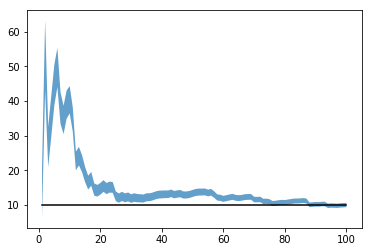

In [120]:
def LeftBorder2(X):
    n = np.arange(1, X.size + 1)
    sample_mean = X.cumsum() / n
    sample_var = (X**2).cumsum() / n - sample_mean**2
    sample_var[0] = 1
    return sample_mean**2 / sample_var - \
        (sample_mean / sample_var) * (np.sqrt(sample_var / n) * Standartppf((1 + alpha) / 2))

def RightBorder2(X):
    n = np.arange(1, X.size + 1)
    sample_mean = X.cumsum() / n
    sample_var = (X**2).cumsum() / n - sample_mean**2
    sample_var[0] = 1
    return sample_mean**2 / sample_var - \
        (sample_mean / sample_var) * (np.sqrt(sample_var / n) * Standartppf((1 - alpha) / 2))

plt.fill_between(n, LeftBorder2(X), RightBorder2(X), alpha=0.7)
plt.plot(n, np.ones(N)*theta0, color="black")
print("Вероятность попадания в доверительный интервал состовляет: {}%".format(\
                    LavelOfConfidence(getSample, LeftBorder2, RightBorder2, theta0)))

Сделаем выводы: так как ДИ - является асимптотическим, при малых $N$ - он дает плохие значения вероятности попдания истинного значения в него, при увелечении $N$, из графика видно что интервал подходит ближе к истинному значению. 